In [2]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [6]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [9]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [11]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


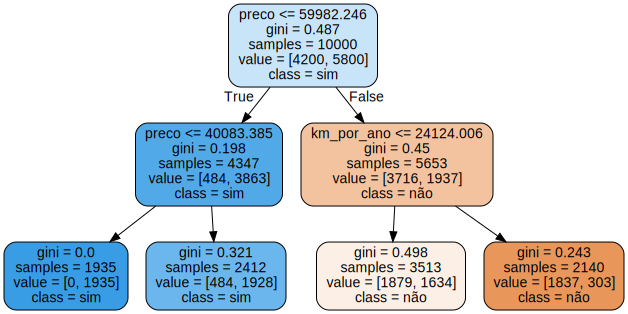

In [12]:
import graphviz
from sklearn.tree import export_graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True,
                           class_names = ['não','sim'], feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [13]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
# testando com max_depth = 3
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


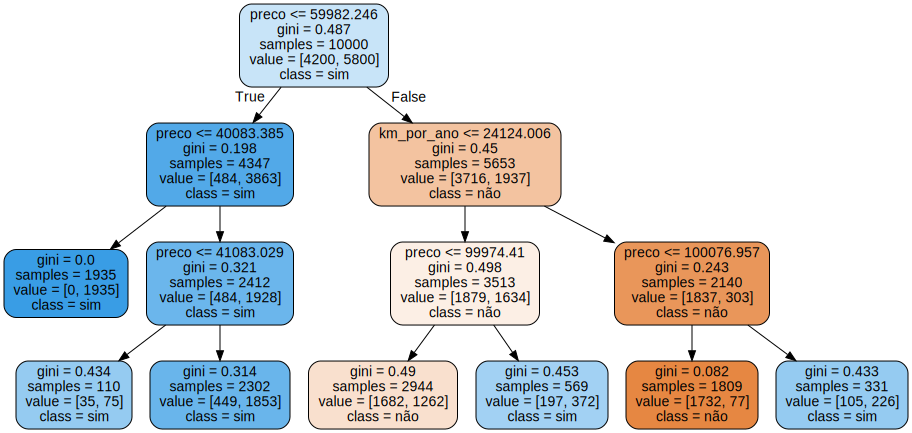

In [14]:
modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True,
                           class_names = ['não','sim'], feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [15]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
# testando com max_depth = 10
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


# Testando parâmetros

In [16]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  # testando com max_depth = 10
  modelo = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
  print('Max_depth = %d e media = %.2f%%' % (max_depth, results['test_score'].mean() * 100))

In [17]:
roda_arvore_de_decisao(5)

Max_depth = 5 e media = 78.56%


In [18]:
for i in range(1,33):
  roda_arvore_de_decisao(i)

Max_depth = 1 e media = 75.78%
Max_depth = 2 e media = 75.78%
Max_depth = 3 e media = 78.67%
Max_depth = 4 e media = 78.63%
Max_depth = 5 e media = 78.56%
Max_depth = 6 e media = 78.12%
Max_depth = 7 e media = 77.96%
Max_depth = 8 e media = 77.86%
Max_depth = 9 e media = 77.38%
Max_depth = 10 e media = 77.19%
Max_depth = 11 e media = 76.97%
Max_depth = 12 e media = 76.49%
Max_depth = 13 e media = 75.81%
Max_depth = 14 e media = 75.66%
Max_depth = 15 e media = 75.16%
Max_depth = 16 e media = 75.11%
Max_depth = 17 e media = 74.74%
Max_depth = 18 e media = 74.33%
Max_depth = 19 e media = 74.34%
Max_depth = 20 e media = 74.22%
Max_depth = 21 e media = 73.80%
Max_depth = 22 e media = 73.81%
Max_depth = 23 e media = 73.38%
Max_depth = 24 e media = 73.43%
Max_depth = 25 e media = 73.14%
Max_depth = 26 e media = 73.04%
Max_depth = 27 e media = 72.91%
Max_depth = 28 e media = 72.66%
Max_depth = 29 e media = 72.73%
Max_depth = 30 e media = 72.81%
Max_depth = 31 e media = 72.86%
Max_depth = 32 e 

In [19]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  # testando com max_depth = 10
  modelo = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  print('Max_depth = %d , media de treino %.2f e media de teste = %.2f' % (max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100))

In [20]:
for i in range(1,33):
  roda_arvore_de_decisao(i)

Max_depth = 1 , media de treino 75.79 e media de teste = 75.78
Max_depth = 2 , media de treino 75.79 e media de teste = 75.78
Max_depth = 3 , media de treino 78.75 e media de teste = 78.67
Max_depth = 4 , media de treino 78.79 e media de teste = 78.63
Max_depth = 5 , media de treino 78.94 e media de teste = 78.56
Max_depth = 6 , media de treino 79.17 e media de teste = 78.12
Max_depth = 7 , media de treino 79.50 e media de teste = 77.96
Max_depth = 8 , media de treino 79.89 e media de teste = 77.86
Max_depth = 9 , media de treino 80.46 e media de teste = 77.38
Max_depth = 10 , media de treino 81.16 e media de teste = 77.19
Max_depth = 11 , media de treino 82.03 e media de teste = 76.97
Max_depth = 12 , media de treino 82.89 e media de teste = 76.49
Max_depth = 13 , media de treino 83.95 e media de teste = 75.81
Max_depth = 14 , media de treino 85.03 e media de teste = 75.66
Max_depth = 15 , media de treino 86.14 e media de teste = 75.16
Max_depth = 16 , media de treino 87.19 e media de

In [21]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  # testando com max_depth = 10
  modelo = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print('Max_depth = %d , media de treino %.2f e media de teste = %.2f' % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela

In [22]:
resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados

Max_depth = 1 , media de treino 75.79 e media de teste = 75.78
Max_depth = 2 , media de treino 75.79 e media de teste = 75.78
Max_depth = 3 , media de treino 78.75 e media de teste = 78.67
Max_depth = 4 , media de treino 78.79 e media de teste = 78.63
Max_depth = 5 , media de treino 78.94 e media de teste = 78.56
Max_depth = 6 , media de treino 79.17 e media de teste = 78.12
Max_depth = 7 , media de treino 79.50 e media de teste = 77.96
Max_depth = 8 , media de treino 79.89 e media de teste = 77.86
Max_depth = 9 , media de treino 80.46 e media de teste = 77.38
Max_depth = 10 , media de treino 81.16 e media de teste = 77.19
Max_depth = 11 , media de treino 82.03 e media de teste = 76.97
Max_depth = 12 , media de treino 82.89 e media de teste = 76.49
Max_depth = 13 , media de treino 83.95 e media de teste = 75.81
Max_depth = 14 , media de treino 85.03 e media de teste = 75.66
Max_depth = 15 , media de treino 86.14 e media de teste = 75.16
Max_depth = 16 , media de treino 87.19 e media de

[[1, 75.79116856866345, 75.78421883757397],
 [2, 75.79116856866345, 75.78421883757397],
 [3, 78.75099279906651, 78.67263337284332],
 [4, 78.78762769262194, 78.63280264599946],
 [5, 78.9410073693779, 78.55591244881775],
 [6, 79.17011453793069, 78.12326641953089],
 [7, 79.49680619886925, 77.96318477047309],
 [8, 79.8878103533372, 77.85795103730995],
 [9, 80.45900912486006, 77.3769561546462],
 [10, 81.15899430522666, 77.19420355606299],
 [11, 82.0324897748914, 76.97155235848373],
 [12, 82.89479711407509, 76.49439895201009],
 [13, 83.94708663888434, 75.80733123067736],
 [14, 85.0296638417324, 75.66048240262317],
 [15, 86.14300852294707, 75.15633049496758],
 [16, 87.19199906684938, 75.10782992856304],
 [17, 88.30979402742274, 74.73565827883768],
 [18, 89.25870628782606, 74.33375452328517],
 [19, 90.32425183685724, 74.33789590095503],
 [20, 91.32108470047993, 74.223477897303],
 [21, 92.13877325024768, 73.80182272660134],
 [22, 93.01867719757558, 73.81181823864084],
 [23, 93.7956313685999, 73

In [23]:
resultados = pd.DataFrame(resultados, columns = ['max_depth','train','test'])
resultados

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185
7,8,79.887810,77.857951
8,9,80.459009,77.376956
9,10,81.158994,77.194204


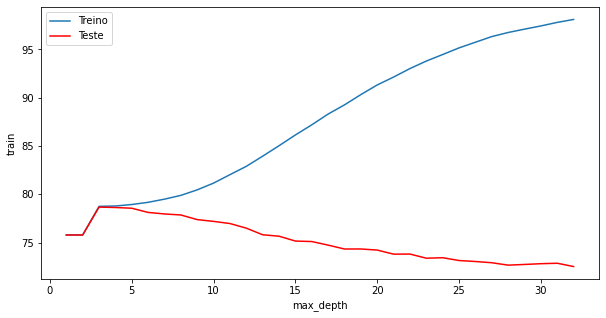

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
sns.lineplot(x = 'max_depth', y = 'train', data = resultados)
sns.lineplot(x = 'max_depth', y = 'test', data = resultados, color = 'red')
plt.legend(['Treino','Teste'])

Ocorreu um OVERFIT, onde o modelo ficou ótimo para os dados de treino, mas ruim para os dados de teste

In [25]:
resultados.sort_values('test', ascending = False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


# Explorando hiperparâmetros em duas dimensões

In [26]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  # testando com max_depth = 10
  modelo = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print('Max_depth = %d, min_samples_leaf = %d, media de treino %.2f e media de teste = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32,64,128,256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf','train','test'])
  return resultados

resultados = busca()
resultados.head()

Max_depth = 1, min_samples_leaf = 32, media de treino 75.79 e media de teste = 75.78
Max_depth = 1, min_samples_leaf = 64, media de treino 75.79 e media de teste = 75.78
Max_depth = 1, min_samples_leaf = 128, media de treino 75.79 e media de teste = 75.78
Max_depth = 1, min_samples_leaf = 256, media de treino 75.79 e media de teste = 75.78
Max_depth = 2, min_samples_leaf = 32, media de treino 75.79 e media de teste = 75.78
Max_depth = 2, min_samples_leaf = 64, media de treino 75.79 e media de teste = 75.78
Max_depth = 2, min_samples_leaf = 128, media de treino 75.79 e media de teste = 75.78
Max_depth = 2, min_samples_leaf = 256, media de treino 75.79 e media de teste = 75.78
Max_depth = 3, min_samples_leaf = 32, media de treino 78.75 e media de teste = 78.67
Max_depth = 3, min_samples_leaf = 64, media de treino 78.75 e media de teste = 78.67
Max_depth = 3, min_samples_leaf = 128, media de treino 78.75 e media de teste = 78.67
Max_depth = 3, min_samples_leaf = 256, media de treino 78.75

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [27]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [28]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.780775e-16,0.536705,-0.027675
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.409676,0.349011
train,5.367048e-01,-4.096762e-01,1.000000,0.116466
test,-2.767507e-02,3.490111e-01,0.116466,1.000000


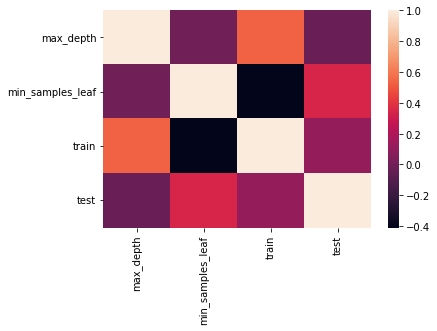

In [29]:
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafebd51d90>,
      dtype=object)

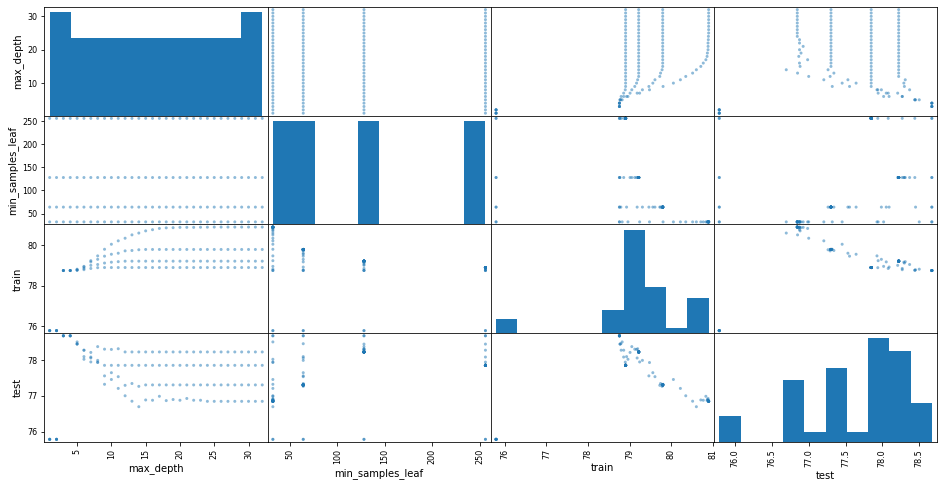

In [30]:
pd.plotting.scatter_matrix(resultados, figsize = (16,8))

# Explorando 3 dimensões de hiperparâmetros 

In [31]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32,64,128,256]:
      for min_samples_split in [32,64,128,256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf','min_samples_split','train','test', 'fit_time','score_time'])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.015467,0.002116
1,1,32,64,75.791169,75.784219,0.006051,0.001761
2,1,32,128,75.791169,75.784219,0.005689,0.001571
3,1,32,256,75.791169,75.784219,0.005857,0.001742
4,1,64,32,75.791169,75.784219,0.005763,0.001638


In [32]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.012234,0.001831
48,4,32,32,78.750993,78.672633,0.014888,0.002499
34,3,32,128,78.750993,78.672633,0.011189,0.002078
35,3,32,256,78.750993,78.672633,0.011201,0.002146
36,3,64,32,78.750993,78.672633,0.011313,0.002247


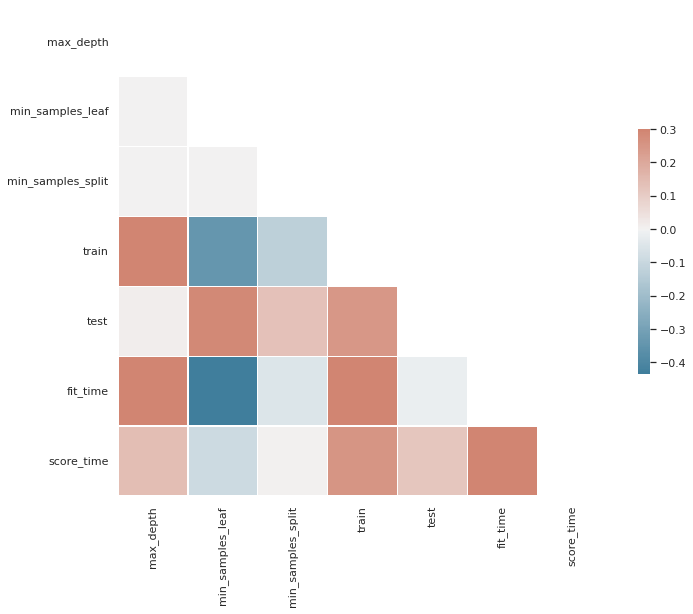

In [33]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# **Explorando espaço de hiperparâmetros com GridSearchCV**

In [34]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaço_parametros = {'max_depth':[3,5],
                     'min_samples_split': [32,64,128,256],
                     'min_samples_leaf':[32,64,128,256],
                     'criterion':['gini','entropy']}

busca = GridSearchCV(DecisionTreeClassifier(),espaço_parametros, cv = GroupKFold(n_splits = 10))

busca.fit(x_azar,y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011359,0.000821,0.002059,0.000211,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.011605,0.001325,0.002123,0.000479,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.011236,0.000599,0.002062,0.000336,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.012359,0.002451,0.002136,0.000386,gini,3,32,256,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.012775,0.001939,0.002593,0.000628,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [35]:
print(busca.best_params_)
print((busca.best_score_)* 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [36]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [37]:
# É PRECISO EVITAR ESSA ABORDAGEM POIS ELA É MUITO OTIMISTA E NÃO APRESENTA UM VALOR REAL

from sklearn.metrics import accuracy_score

predicoes = melhor.predict(x_azar)
acurracy = accuracy_score(predicoes, y_azar) * 100
print('A acurácia foi de %.2f%%' % acurracy)

A acurácia foi de 78.75%


# Como ter uma estimativa sem esse vicio nos dados?
No caso do cross validation com busca de hiper parametros, fazemos uma nova validação cruzada. Chama-se Nested Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

cross_val_score(busca,x_azar,y_azar, cv = GroupKFold(n_splits = 10), groups = dados.modelo)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

# Infelizmente como o Pandas não suporta o nested validation com group k fold, não conseguiremos prever o resultado para novos grupos.

# Usando o KFold sem o Group

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espaço_parametros = {'max_depth':[3,5],
                     'min_samples_split': [32,64,128,256],
                     'min_samples_leaf':[32,64,128,256],
                     'criterion':['gini','entropy']}

busca = GridSearchCV(DecisionTreeClassifier(),espaço_parametros, cv = KFold(n_splits = 5, shuffle = True))

busca.fit(x_azar,y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011332,0.002297,0.002271,0.000197,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.010586,0.000765,0.002319,0.000217,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.011544,0.001313,0.002459,0.000543,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010181,0.000218,0.002270,0.000180,gini,3,32,256,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.010242,0.000125,0.002179,0.000032,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [40]:
scores = cross_val_score(busca,x_azar,y_azar, cv = KFold(n_splits = 5, shuffle = True), groups = dados.modelo)
scores

array([0.779 , 0.7885, 0.7875, 0.7755, 0.8025])

In [41]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [42]:
imprime_score(scores)

Accuracy médio 78.66
Intervalo [76.79, 80.53]


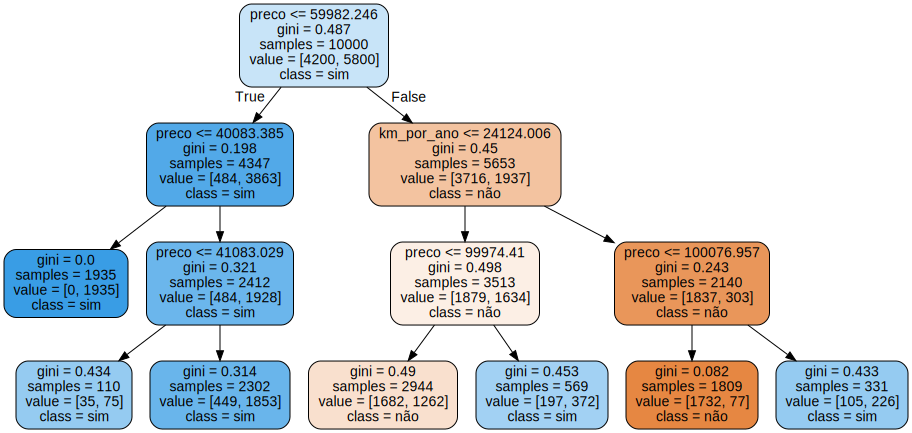

In [43]:
import graphviz
from sklearn.tree import export_graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file = None, filled = True, rounded = True,
                           class_names = ['não','sim'], feature_names = features)
graph = graphviz.Source(dot_data)
graph

# **Busca Aleatória: Random Search**

In [46]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 301
np.random.seed(SEED)

espaço_parametros = {'max_depth':[3,5],
                     'min_samples_split': [32,64,128,256],
                     'min_samples_leaf':[32,64,128,256],
                     'criterion':['gini','entropy']}

busca = RandomizedSearchCV(DecisionTreeClassifier(),espaço_parametros, n_iter = 16, cv = KFold(n_splits = 5, shuffle = True), random_state = SEED)

busca.fit(x_azar,y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014497,0.001707,0.002176,0.000072,64,64,5,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,9
1,0.013406,0.000149,0.002163,0.000064,256,32,5,gini,"{'min_samples_split': 256, 'min_samples_leaf':...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,9
2,0.009985,0.000193,0.002053,0.000053,256,128,3,gini,"{'min_samples_split': 256, 'min_samples_leaf':...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
3,0.010510,0.000427,0.002245,0.000136,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
4,0.012541,0.000381,0.002302,0.000202,256,256,5,gini,"{'min_samples_split': 256, 'min_samples_leaf':...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1


In [47]:
scores = cross_val_score(busca,x_azar,y_azar, cv = KFold(n_splits = 5, shuffle = True), groups = dados.modelo)
scores

array([0.7825, 0.783 , 0.794 , 0.778 , 0.795 ])

In [49]:
imprime_score(scores)

Accuracy médio 78.65
Intervalo [77.30, 80.00]


In [50]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=128, min_samples_split=256)


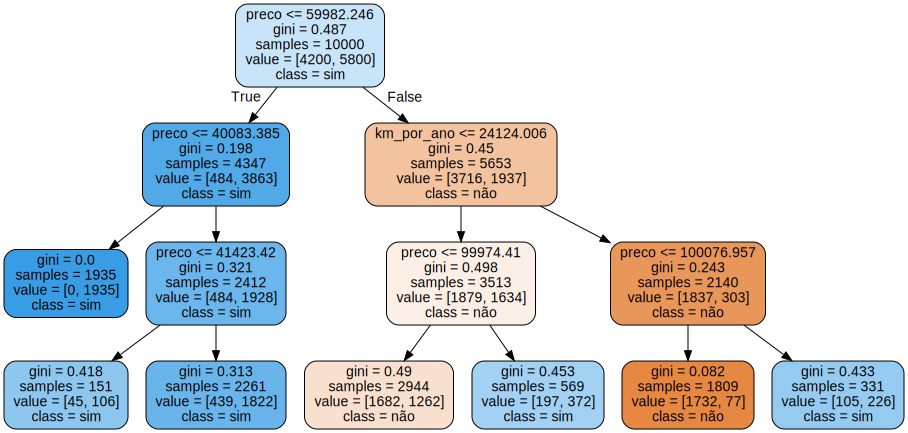

In [51]:
import graphviz
from sklearn.tree import export_graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file = None, filled = True, rounded = True,
                           class_names = ['não','sim'], feature_names = features)
graph = graphviz.Source(dot_data)
graph

# Customizando espaços de hiperparâmetros

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

espaço_parametros = {'max_depth':[3,5,10,15,20,25,30],
                     'min_samples_split': randint(32,128),
                     'min_samples_leaf':randint(32,128),
                     'criterion':['gini','entropy']}

busca = RandomizedSearchCV(DecisionTreeClassifier(),espaço_parametros, n_iter = 16, cv = KFold(n_splits = 5, shuffle = True), random_state = SEED)

busca.fit(x_azar,y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014277,0.000216,0.002296,0.000079,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
1,0.019177,0.001936,0.003384,0.001690,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,0.7725,0.7830,0.7805,0.7725,0.7765,0.004393,14
2,0.016805,0.000676,0.002414,0.000073,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,0.7745,0.7990,0.7790,0.7735,0.7793,0.010221,8
3,0.021784,0.001289,0.002674,0.000057,gini,30,46,62,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.7575,0.7730,0.7725,0.7835,0.7560,0.7685,0.010378,16
4,0.017015,0.000945,0.002547,0.000092,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,0.7735,0.7995,0.7790,0.7745,0.7794,0.010413,7


In [54]:
scores = cross_val_score(busca,x_azar,y_azar, cv = KFold(n_splits = 5, shuffle = True), groups = dados.modelo)
scores

array([0.7825, 0.783 , 0.794 , 0.781 , 0.795 ])

In [55]:
imprime_score(scores)

Accuracy médio 78.71
Intervalo [77.49, 79.93]


In [56]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [62]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending = False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.784 +-(0.024) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.781 +-(0.017) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +-(0.019) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.780 +-(0.012) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.779 +-(0.021) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.779 +-(0.020) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.779 +-(0.009) {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.779 +-(0.014) {'criterion': 'entropy', 'max_depth':

In [64]:
# pegando o melhor modelo para usar na produção
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


# Exploração mais a fundo de forma aleatória

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

SEED = 712
np.random.seed(SEED)

espaço_parametros = {'max_depth':[3,5,10,15,20,25,30],
                     'min_samples_split': randint(32,128),
                     'min_samples_leaf':randint(32,128),
                     'criterion':['gini','entropy']}

busca = RandomizedSearchCV(DecisionTreeClassifier(),espaço_parametros, n_iter = 64, cv = KFold(n_splits = 5, shuffle = True), random_state = SEED)

busca.fit(x_azar,y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028337,0.002059,0.003017,0.000817,entropy,30,85,52,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.7635,0.7705,0.7910,0.7790,0.7930,0.7794,0.011417,34
1,0.026379,0.000556,0.002675,0.000086,entropy,30,90,78,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.7585,0.7710,0.7935,0.7790,0.7895,0.7783,0.012667,38
2,0.019913,0.001557,0.003173,0.000621,gini,10,67,66,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.7710,0.7685,0.7935,0.7645,0.7920,0.7779,0.012310,44
3,0.019113,0.000817,0.002817,0.000336,gini,30,87,40,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.7640,0.7705,0.7935,0.7705,0.7930,0.7783,0.012436,38
4,0.029593,0.000803,0.002756,0.000411,entropy,10,48,78,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.7755,0.7625,0.7875,0.7650,0.7900,0.7761,0.011240,55


In [69]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending = False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +-(0.023) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 78}
0.787 +-(0.023) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 77, 'min_samples_split': 56}
0.787 +-(0.023) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 56, 'min_samples_split': 62}
0.787 +-(0.023) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 70}
0.786 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 112, 'min_samples_split': 50}
0.786 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 123, 'min_samples_split': 82}
0.786 +-(0.025) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 78, 'min_samples_split': 104}
0.786 +-(0.025) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 70, 'min_samples_split': 112}
0.786 +-(0.025) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 83, 'min_samples_split': 57}
0.786 +-(0.025) {'criterion': 'entropy', 'max_depth': 5, 'min_s

In [70]:
# pegando o melhor modelo para usar na produção
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=56, min_samples_split=62)


# **Comparando GridSearch com RandomizedSearch**

In [72]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

espaço_parametros = {'n_estimators': [10,100],
                     'max_depth':[3,5],
                     'min_samples_split': [32,64,128,256],
                     'min_samples_leaf':[32,64,128,256],
                     'bootstrap': [True, False],
                     'criterion':['gini','entropy']}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(),espaço_parametros, cv = KFold(n_splits = 5, shuffle = True))
busca.fit(x_azar,y_azar, groups = dados.modelo)
tac = time.time()
tempo_que_passou = tac - tic
print('Tempo %.2f segundo' % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 379.90 segundo


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064672,0.003153,0.010340,0.005629,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7560,0.7490,0.7850,0.7450,0.7619,0.015357,227
1,0.481330,0.243836,0.026029,0.002676,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7655,0.7555,0.7945,0.7850,0.7625,0.7726,0.014685,149
2,0.039436,0.002037,0.004640,0.000143,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7635,0.7835,0.7845,0.7560,0.7731,0.011373,141
3,0.364501,0.008079,0.025990,0.002012,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7425,0.7550,0.7950,0.7850,0.7620,0.7679,0.019356,201
4,0.039265,0.001962,0.005501,0.000925,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7405,0.7485,0.7760,0.7630,0.7607,0.014250,234


In [73]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending = False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.780 +-(0.025) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 256, 'n_estimators': 10}
0.780 +-(0.023) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 32, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 256, 'n_estimators': 100}
0.778 +-(0.025) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 100}


In [86]:
'''
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)

melhor = busca.best_estimator_
print(melhor)
'''

'\ntic = time.time()\nscores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))\ntac = time.time()\ntempo_passado = tac - tic\nprint("Tempo %.2f segundos" % tempo_passado)\n\nimprime_score(scores)\n\nmelhor = busca.best_estimator_\nprint(melhor)\n'

In [76]:
SEED = 301
np.random.seed(SEED)

espaço_parametros = {'n_estimators': [10,100],
                     'max_depth':[3,5],
                     'min_samples_split': [32,64,128,256],
                     'min_samples_leaf':[32,64,128,256],
                     'bootstrap': [True, False],
                     'criterion':['gini','entropy']}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),espaço_parametros, n_iter = 20, cv = KFold(n_splits = 5, shuffle = True))
busca.fit(x_azar,y_azar, groups = dados.modelo)
tac = time.time()
tempo_que_passou = tac - tic
print('Tempo %.2f segundo' % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 34.03 segundo


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.597464,0.145354,0.036826,0.006692,100,32,256,3,gini,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7695,0.7635,0.7955,0.7780,0.7680,0.7749,0.011320,5
1,0.046172,0.001783,0.005310,0.000077,10,32,128,5,gini,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7695,0.7570,0.7850,0.7745,0.7655,0.7703,0.009320,15
2,0.416438,0.006019,0.025349,0.000810,100,128,32,3,gini,False,"{'n_estimators': 100, 'min_samples_split': 128...",0.7700,0.7635,0.7945,0.7775,0.7690,0.7749,0.010768,5
3,0.048647,0.002857,0.005584,0.000950,10,64,32,3,entropy,True,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.7625,0.7615,0.7960,0.7515,0.7785,0.7700,0.015614,16
4,0.080073,0.003496,0.005663,0.000217,10,32,128,5,entropy,False,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7670,0.7660,0.7945,0.7785,0.7620,0.7736,0.011804,11


In [78]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending = False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.776 +-(0.017) {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 128, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
0.776 +-(0.024) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}
0.775 +-(0.023) {'n_estimators': 100, 'min_samples_split': 256, 'min_samples_leaf': 256, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': True}
0.775 +-(0.022) {'n_estimators': 100, 'min_samples_split': 256, 'min_samples_leaf': 128, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}
0.775 +-(0.023) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 256, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': True}


In [77]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)

melhor = busca.best_estimator_
print(melhor)

Tempo 129.46 segundos
Accuracy médio 76.89
Intervalo [73.89, 79.89]
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=128, min_samples_split=64,
                       n_estimators=10)


In [82]:
SEED = 301
np.random.seed(SEED)

espaço_parametros = {'n_estimators': randint(10,101),
                     'max_depth':randint(3,6),
                     'min_samples_split': randint(32,129),
                     'min_samples_leaf':randint(32,129),
                     'bootstrap': [True, False],
                     'criterion':['gini','entropy']}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),espaço_parametros, n_iter = 80, cv = KFold(n_splits = 5, shuffle = True))
busca.fit(x_azar,y_azar, groups = dados.modelo)
tac = time.time()
tempo_que_passou = tac - tic
print('Tempo %.2f segundo' % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 110.15 segundo


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.373935,0.006859,0.022709,0.000486,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7620,0.7750,0.7855,0.7580,0.7704,0.009744,75
1,0.280470,0.004248,0.021509,0.001283,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7715,0.7575,0.7925,0.7855,0.7575,0.7729,0.014277,63
2,0.267496,0.003403,0.020417,0.001443,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7695,0.7925,0.7795,0.7575,0.7735,0.011781,59
3,0.177775,0.003188,0.013603,0.000209,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7670,0.7830,0.7865,0.7580,0.7733,0.010429,60
4,0.276313,0.006728,0.018633,0.000164,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7685,0.7930,0.7850,0.7585,0.7754,0.012220,30


In [80]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending = False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.776 +-(0.015) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 69, 'min_samples_split': 63, 'n_estimators': 99}
0.776 +-(0.014) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 78, 'min_samples_split': 103, 'n_estimators': 84}
0.775 +-(0.016) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 51, 'min_samples_split': 104, 'n_estimators': 66}
0.775 +-(0.015) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 85, 'n_estimators': 66}
0.775 +-(0.015) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 74, 'min_samples_split': 58, 'n_estimators': 81}


In [81]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)

melhor = busca.best_estimator_
print(melhor)

Tempo 130.30 segundos
Accuracy médio 77.37
Intervalo [76.62, 78.12]
RandomForestClassifier(max_depth=5, min_samples_leaf=69, min_samples_split=63,
                       n_estimators=99)


# Se eu não posso ou não consigo usar o cross validation

In [91]:
# 0.6 treino
# 0.2 teste
# 0.2 validação

from sklearn.model_selection import train_test_split

SEED = 301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size = 0.2, shuffle = True, stratify = y_azar)

print(x_treino_teste.shape)
print(x_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [113]:
from sklearn.model_selection import StratifiedShuffleSplit



SEED = 301
np.random.seed(SEED)

espaço_parametros = {'n_estimators': randint(10,101),
                     'max_depth':randint(3,6),
                     'min_samples_split': randint(32,129),
                     'min_samples_leaf':randint(32,129),
                     'bootstrap': [True, False],
                     'criterion':['gini','entropy']}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)
tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),espaço_parametros, n_iter = 5, cv = split)
busca.fit(x_treino_teste,y_treino_teste)
tac = time.time()
tempo_que_passou = tac - tic
print('Tempo %.2f segundo' % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 2.67 segundo


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.584821,0.0,0.042062,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7745,0.7745,0.0,2
1,0.416317,0.0,0.034305,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7735,0.7735,0.0,5
2,0.400974,0.0,0.045569,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2
3,0.267069,0.0,0.022602,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7750,0.7750,0.0,1
4,0.367189,0.0,0.039881,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2


In [112]:
tic = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv = split)
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

print('%.2f%%' % (scores * 100))

Tempo 0.59 segundos
75.40%
